# Week 6
Josuha Hummell, Jiho Kim, Scott Reed

## Data load

We load the data using the [networkX example code](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

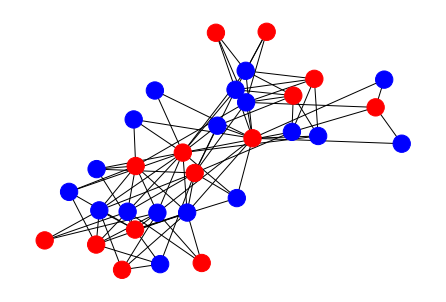

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

    


In [12]:
C = bipartite.weighted_projected_graph(G, clubs)
print()
print("#Clubs , Club Meeting")
def accessor(w):
    return C.degree(w)
clubs.sort(reverse=True, key=accessor)
for w in clubs:
    print(f"{accessor(w)} {w}")
print("#Club Friends, Club Meeting")
def accessor(w):
    return C.degree(w, weight='weight')
clubs.sort(reverse=True, key=accessor)
for w in clubs:
    print(f"{accessor(w)} {w}")



#Members Present, Club Meeting
13 E6
13 E9
13 E7
13 E8
8 E11
8 E13
8 E14
8 E1
8 E2
8 E4
8 E10
8 E12
8 E3
8 E5
#Members Friends, Club Meeting
59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


We see that while E6-E9 are fully connected to every event, E8 has the most weight of connections. Were we to designate one meeting to spread vicious rumor during it would be e8 

In [44]:

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
def accessor(w):
    return W.degree(w)
women.sort(reverse=True,key=accessor)
print("#Friends, Member")
for w in women:
    print(f"{accessor(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
def accessor(w):
    return W.degree(w, weight='weight')
women.sort(reverse=True,key=accessor)
sizes = {w:accessor(w)*10 for w in women}
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{accessor(w)} {w}")
def accessor(w):
    return C.degree(w, weight='weight')
sizes.update({w:accessor(w)*10 for w in clubs})



#Friends, Member
17 Theresa Anderson
17 Evelyn Jefferson
17 Sylvia Avondale
17 Nora Fayette
17 Ruth DeSand
17 Verne Sanderson
17 Helen Lloyd
16 Katherina Rogers
16 Myra Liddel
16 Pearl Oglethorpe
16 Dorothy Murchison
15 Brenda Rogers
15 Laura Mandeville
15 Eleanor Nye
15 Frances Anderson
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd

#Friend meetings, Member
57 Theresa Anderson
50 Evelyn Jefferson
46 Sylvia Avondale
46 Brenda Rogers
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Dorothy Murchison
24 Charlotte McDowd
14 Olivia Carleton
14 Flora Price


Looking at women we see that a number are fully connected to every member (17) Theresa Anderson however has a far and away better connections. Should one want to reveal something and not have it spread across the entire world Flora Price or Olivia Carleton would seem to buy some time. 

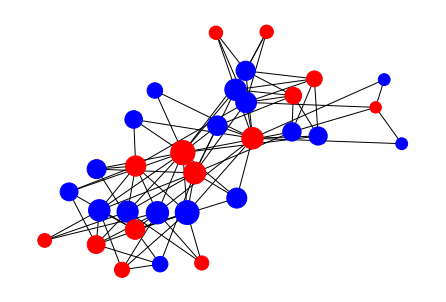

In [47]:
colors = ["blue" if i in women  else "red" for i in G.nodes]
nodesizes = [sizes[i] for i in G.nodes]
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos, with_labels=False, node_color=colors, node_size=nodesizes)
plt.show()